## The Merged Rotten Tomatoes Dataset

In [1]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We are going to merge the 'rt.movie_info' and the 'rt.reviews' datasets so as to form one dataset that we will use in our analysis.

This is the cleaned 'rt.info' that we are going to use to merge with our 'rt.reviews' so that we can use the merged dataset for analization. 

In [2]:
#Loading the cleaned 'rt.movies_info' dataset
df_rt_cleaned = pd.read_csv("df2_export.tsv", sep="\t", index_col=0)

In [3]:
#Checking the first five rows of the dataset
df_rt_cleaned.head()

,id,rating,genre,director,writer,theater_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,104
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,116
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,128
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200


This is the cleaned 'rt.reviews' that we are going to use to merge with our 'rt.info' so that we can use the merged dataset for analization. 

In [4]:
#Loading the cleaned 'rt.reviews' dataset 
review_aggregated1 = pd.read_csv("cleaned_rt.reviews.tsv", keep_default_na=False) #delimiter="\t", encoding = 'latin1')
review_aggregated1

,id,rating_10_point,fresh,critic,publisher,review
0,3,6.2,1,PJ Nabarro,Patrick Nabarro,A distinctly gallows take on contemporary fina...
1,5,6.8,1,David Ansen,Newsweek,This is not the smoothest trip: the transition...
2,6,6.0,1,Malcolm Johnson,Hartford Courant,Though directed with machine-like precision by...
3,8,6.6,1,Nell Minow,Common Sense Media,"Great boy-and-dog tale, but be prepared for te..."
4,10,6.0,0,Unknown,Film4,"It won't stick with you forever, but you will ..."
...,...,...,...,...,...,...
1130,1996,6.2,1,Joel Siegel,Good Morning America,"This is a good-looking film, and Jackson is ju..."
1131,1997,5.1,0,Dennis Schwartz,Ozus' World Movie Reviews,It ultimately fails because it lacks sufficien...
1132,1998,6.0,1,Ken Hanke,"Mountain Xpress (Asheville, NC)",Better than average Elvis vehicle.more enterta...
1133,1999,5.9,1,Malcolm Johnson,Hartford Courant,The Sandlot almost does for baseball what A Ch...


Since both datasets have a common 'id' column, we are going to use that to merge the two using the left join so that we don't lose a lot of data.

In [5]:
#Merging the two 'rt' datasets using the 'id' column
merged_df = pd.merge(df_rt_cleaned, review_aggregated1, on='id', how='left')

In [6]:
#Checking the first five rows of the merged dataset
merged_df.head()

,id,rating,genre,director,writer,theater_date,runtime,rating_10_point,fresh,critic,publisher,review
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,104,NaN,NaN,NaN,NaN,NaN
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,6.2,1.0,PJ Nabarro,Patrick Nabarro,A distinctly gallows take on contemporary fina...
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,116,6.8,1.0,David Ansen,Newsweek,This is not the smoothest trip: the transition...
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,128,6.0,1.0,Malcolm Johnson,Hartford Courant,Though directed with machine-like precision by...
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200,NaN,NaN,NaN,NaN,NaN


In [7]:
#Checking the shape and the columns of the new merged dataset
print("Merged shape:", merged_df.shape)
print("\nMerged columns:", merged_df.columns.tolist())
merged_df.head()

Merged shape: (1560, 12)

Merged columns: ['id', 'rating', 'genre', 'director', 'writer', 'theater_date', 'runtime', 'rating_10_point', 'fresh', 'critic', 'publisher', 'review']


,id,rating,genre,director,writer,theater_date,runtime,rating_10_point,fresh,critic,publisher,review
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,104,NaN,NaN,NaN,NaN,NaN
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,6.2,1.0,PJ Nabarro,Patrick Nabarro,A distinctly gallows take on contemporary fina...
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,116,6.8,1.0,David Ansen,Newsweek,This is not the smoothest trip: the transition...
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,128,6.0,1.0,Malcolm Johnson,Hartford Courant,Though directed with machine-like precision by...
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200,NaN,NaN,NaN,NaN,NaN


In [8]:
#Checking for null values in the new merged dataset
merged_df.isna().sum()

id                   0
rating               0
genre                0
director             0
writer               0
theater_date       359
runtime              0
rating_10_point    425
fresh              425
critic             425
publisher          425
review             425
dtype: int64

We are going to drop the 'fresh', 'critic' and 'publisher' columns because we won't really need them in our data analysis.

In [9]:
#Dropping columns that are irrelevant
merged_df.drop(columns=["critic", "publisher", "review"], axis=1, inplace= True)
merged_df.columns

Index(['id', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'runtime', 'rating_10_point', 'fresh'],
      dtype='object')

For the 'rating_10_point' column which is numeric, we will check the distribution of the column and either fill it with the mean or median of that column, depending on how skewed the distribution is.

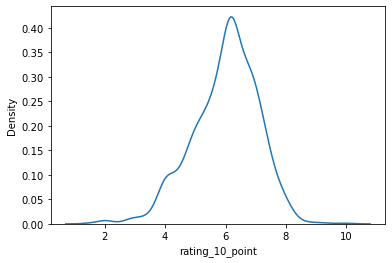

In [10]:
#Looking at the distribution of the 'rating_10_point' column
sns.kdeplot(merged_df["rating_10_point"])
plt.show()

Since the distribution is somehow skewed to the left, it is safer to fill the null values in that column with median.

In [11]:
#Filling the missing values in 'rating_10_point' column with median
median_rating_10_point= merged_df["rating_10_point"].median()
merged_df.fillna({"rating_10_point": median_rating_10_point}, inplace=True)

#Checking if there are still any null values even after filling them
merged_df["rating_10_point"].isna().sum()

0

For the 'fresh' column, since its value are in binary form, we will fill the null values using the mode of that particular column. 

In [12]:
#Filling the missing values in 'fresh' column with mode
merged_df['fresh'] = merged_df['fresh'].fillna(merged_df['fresh'].mode()[0])

#Checking if there are still any null values even after filling them
merged_df["fresh"].isna().sum()

0

We will then save the merged the dataset after cleaning so that we can use it in the next stage which is Exploratory Data Analysis.

In [13]:
#Saving the cleaned dataset
merged_df.to_csv("cleaned_merged_df.csv", index= False)
merged_df1 = pd.read_csv("cleaned_merged_df.csv")
merged_df1

,id,rating,genre,director,writer,theater_date,runtime,rating_10_point,fresh
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,104,6.2,1.0
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,6.2,1.0
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,116,6.8,1.0
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,128,6.0,1.0
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200,6.2,1.0
...,...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,unknown,unknown,2006-08-18,106,6.2,1.0
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,88,5.1,0.0
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,unknown,1962-01-01,111,6.0,1.0
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,101,5.9,1.0
